# Exercice 1

## Transformer le code Matlab en Python

In [1]:
import numpy as np
from scipy.stats import norm
import math

Nous importons les librairies math et norm (de scipy.stats) qui nous permettent de calculer la fonction de Black&Scholes.

In [2]:
def BSCall(s,k,sigma,tau,r):
    stau=math.sqrt(tau)
    d1=(np.log(s/(k*math.exp(-r*tau))))/(sigma*stau)+0.5*sigma*stau
    d2=d1-sigma*stau
    bsc=s*norm.cdf(d1)-k*math.exp(-r*tau)*norm.cdf(d2)
    return bsc

Nous utilisons la librairie numpy pour les calculs matriciels. Numpy est très similaire à Matlab par le nom des fonctions et leur utilisation. 

Cependant, il existe quelques particularités à prendre en compte. Tout d'abord, les calculs matriciels sont element-wise par défaut en python alors que ce n'est pas le cas en Matlab.
De plus, pour accéder à un élément d'une matrice en Matlab, nous utilisons les parenthèses alors que ce sont des crochets en Python. D'autres différences existent.

In [3]:
## Parameters
# Black-Scholes parameters
S = 100
K = 100
sigma = 0.2
r = 0.1
T = 0.5
t = 0

# Notation
b = r-sigma**2/2

# Underlying
X = math.log(S)
l = abs(b)*T + 3*sigma*math.sqrt(T) #localization
XL = X-l #lower bound
XU = X+l #upper bound
XN = 101

# Time
tL = 0 # lower bound
tU = T # upper bound
tN = 50

## Grid

# Underlying
Xg = np.linspace(XL,XU,XN)
Sg = np.exp(Xg)

# Time
tg = np.linspace(tL,tU,tN)

# Grid sizes
k = Xg[2]-Xg[1]
h = tg[2]-tg[1]


Notons à nouveau que Python s'interprète grâce aux indentations, donc les boucles et fonctions n'ont pas besoin d'accolades comme Matlab.

Lors de la traduction d'un code Matlab en Python, il faut faire attention aux bases. Matlab crée les matrices en base 1 tandis qu'en Python elles sont en base 0.

In [4]:
## Scheme

# theta = 0 # explicit
theta = 0.5 # Crank-Nicolson
# theta = 1 # fully implicit

u = np.zeros((XN,tN))

# Terminal condition
for j in range(XN):
    u[j,tN-1] = max(Sg[j]-K,0)

# Coefficients
alpha = sigma**2/(2*k**2)-b/(2*k)
beta = -sigma**2/k**2-r
gamma = sigma**2/(2*k**2)+b/(2*k)
Ak = np.zeros((XN, XN))
Ak[range(XN), range(XN)] = beta
Ak[range(XN-1), range(1, XN)] = gamma
Ak[range(1, XN), range(XN-1)] = alpha
A = np.eye(XN)-h*theta*Ak
B = np.eye(XN)+h*(1-theta)*Ak
v = np.zeros((XN))


for i in range(tN,1,-1):
    
    # Vector v
    v[1] = alpha*0
    v[len(v)-1] = gamma*(theta*(Sg[XN-1]*math.exp(k)-K*math.exp(-r*(T-tg[i-2]))) 
                         + (1-theta)*(Sg[XN-1]*math.exp(k)-K*math.exp(-r*(T-tg[i-1]))))
    
    # Systems
    u[:,i-2] = np.linalg.inv(A).dot(B.dot(u[:,i-1])+h*v)#np.divide((B.dot(u[:,i])+h*v),A)

Pour le graphique 3D de la surface de prix de l'option en fonction de la maturité, du striké et du prix du sous-jacent, nous utilisons la fonction Axes3D de la librairie mpl_toolkits.mplot3d.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = T-tg
Y = Sg
X, Y = np.meshgrid(X, Y)
Z = u

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('Time to maturity')
ax.set_ylabel('S_0')
ax.set_zlabel('Price')
plt.title('Finite Differences for Black-Scholes')

plt.show()

Pour le graphique 2D, nous utilisons la librairie très reconnue en Python : matlplotlib.pyplot.

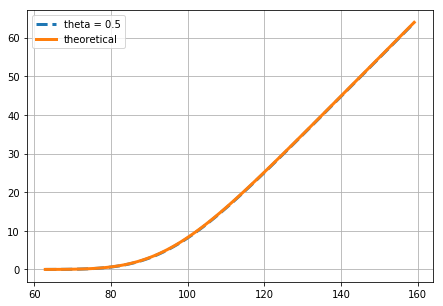

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16,5))
plt.figure(1)
plt.subplot(121)
plt.plot(Sg, u[:, 1] , '--', lw=3, label='theta = ' + str(theta))
plt.plot(Sg, BSCall(Sg,K,sigma,T,r), '-', lw=3, label='theoretical')
plt.grid()
plt.legend()
plt.show()

In [7]:
j = (Sg>=S).nonzero()[0][0] #find(Sg>=S,1)
i = (tg>=t).nonzero()[0][0] #find(tg>=t,1)

Sc = Sg[j]
tc = tg[i]

EstimatedC = u[j,i] # estimated price
TheoreticalC = BSCall(Sc,K,sigma,T-tc,r) # theoretical price
Error = TheoreticalC-EstimatedC # error

In [8]:
print(Error)

0.0027599774493403118
